## ML Pipeline for NLP

### 1. Dataset Structure

| Text Corpus (X) | Labels (Y) |
|-----------------|------------|
| Sample Text 1   | Class 1    |
| Sample Text 2   | Class 0    |

### 2. Data Preprocessing

x_train (text)  
↓  
Data Cleaning  
↓  
x_train_clean (text)

### Data Cleaning Steps

1. Remove special characters  
2. Convert text to lowercase  
3. Remove stopwords  
4. Convert words to root form  
   - Stemming  
   - Lemmatization

# Problem Statement : To find the given email is it spam or ham ( not spam ).

#### Case study = Spam Detection
- The main aim of this project - to demonstrate the basics of NLP.

#### Major Steos Involved :
- 1.Text data visualization
- 2.Text data proprocessing
- 3.Text data to numarical vector conversion using BOW (Bag Of Words)

#### steps:
- 1. Data Loading
  2. EDA
  3. Data preperation 
     - Train Test split
     - Data preprocessing (Remove special char, convert lower case, remove stop-words, Stemming etc.).
     - Converting text to numaric vectors using Bag Of Words.
  4. Training on train data
  5. prediction on test data
  6. Model Evaluation

# 1. Import Prerequisite Libraries

In [31]:
# a basic data handling
import pandas as pd # for handling datasets (n like csv, excel, json etc.)
import numpy as np # for numerical operations and arrays.

# Text Preprocessing
import re        # for reg-ex operation (cleaning text)
import string    # for punctuation handling
import nltk      # Natural Language ToolKit ( for stop-words, stemming etc.).
from nltk.corpus import stopwords   # To remove common , meaningless words like 'the','is','it',.....
from nltk.stem import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer # for lemmatization

# sklearn feature extraction
from sklearn.feature_extraction.text import CountVectorizer  #  Bag Of Words model
from sklearn.feature_extraction.text import TfidfVectorizer    # TF-IDF model # TF-IDF model


# Data Preprocessing and model Building
from sklearn.model_selection import train_test_split #
from sklearn.naive_bayes import MultinomialNB # classifier for text data
from sklearn.linear_model import LogisticRegression  # another good text classifier
from sklearn.svm import SVC  # support vector classifier


# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Progress bar for loops and apply
from tqdm import tqdm  # to visually track long operations
tqdm.pandas()      # Enable progress_apply() in pandas


# Download nltk resoureces  (only need to do once)
#nltk.download('stopwords')
#nltk.download('wordnet')   # for lemmatizer

In [32]:
df = pd.read_csv("email_data.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [33]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [34]:
df.shape

(5171, 4)

# EDA

In [35]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [36]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [37]:
df['label'].value_counts(normalize = True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

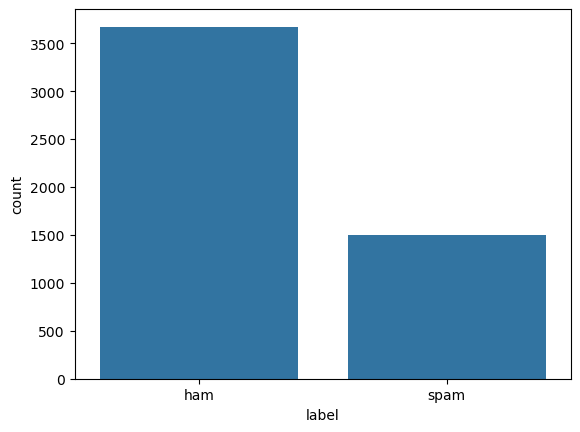

In [38]:
sns.countplot(x = 'label', data = df)

# Data Preperation - split the data into train and test 

In [39]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [40]:
df = df.drop('Unnamed: 0',axis = 1)

In [41]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [42]:
# segregate the data into x and y
y = df['label']
x = df[['text']]

In [43]:
# splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [44]:
X_train.head()

,text
5132,Subject: april activity surveys\nwe are starti...
2067,Subject: message subject\nhey i ' am julie ^ _...
4716,Subject: txu fuels / sds nomination for may 20...
4710,Subject: re : richardson volumes nov 99 and de...
2268,Subject: a new era of online medical care .\na...


In [45]:
X_train.shape

(4136, 1)

# Data Preperation - Text Preprocessing

In [46]:
# Initiolising the inbuilt stemmer
stemmer = PorterStemmer()

# We can aslo use Lemmatizer instead of stemmer
lemmatizer = WordNetLemmatizer()

In [47]:
def preprocess(raw_text,flag):
    #removing special characters and digits
    sentence = re.sub("[^a-zA-Z]"," ",raw_text)

    # change the sentence to lower case
    sentence = sentence.lower()

    # tokenize into words 
    tokens = sentence.split()

    # Remove the stopwords
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming and Lemmatization ( each word is in root form like writing = write )
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [21]:
# now you can use progress_apply instead of 'apply'
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x,'stem'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [02:52<00:00, 23.92it/s]


,0,1
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [48]:
temp_df.columns = ['clean_text_stem','text_length_stem']
temp_df.head()

,clean_text_stem,text_length_stem
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [49]:
X_train = pd.concat([X_train,temp_df],axis = 1)
X_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\nwe are starti...,subject april activ survey start collect data ...,88
2067,Subject: message subject\nhey i ' am julie ^ _...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\na...,subject new era onlin medic care new era onlin...,36


In [18]:
# now you can use progress_apply instead of 'apply'
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x,'lemma'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [02:47<00:00, 24.65it/s]


,0,1
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [50]:
temp_df.columns =['clean_text_lemma','text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [51]:
X_train = pd.concat([X_train,temp_df],axis = 1)
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\nwe are starti...,subject april activ survey start collect data ...,88,subject april activ survey start collect data ...,88
2067,Subject: message subject\nhey i ' am julie ^ _...,subject messag subject hey juli turn high scho...,44,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\na...,subject new era onlin medic care new era onlin...,36,subject new era onlin medic care new era onlin...,36


### Convert Text to numarical vectors - BOW Representation
* step 1 - Learn vocabulary from the train data
* step 2 - Transform the train['email'] to X_train (i.e. DTM)
* step 3 - Transform the test['email'] to X_test (i.e DTM)

In [52]:
vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])
X_train_bow

<4136x33977 sparse matrix of type '<class 'numpy.int64'>'
	with 247598 stored elements in Compressed Sparse Row format>

In [53]:
print("Total unique words :", len(vocab.vocabulary_))
print("Type of train feature :", type(X_train_bow))
print("shape of input data :", type(X_train_bow.shape))

Total unique words : 33977
Type of train feature : <class 'scipy.sparse._csr.csr_matrix'>
shape of input data : <class 'tuple'>


In [54]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
X_test.head()

,text
1566,"Subject: hpl nom for march 30 , 2001\n( see at..."
1988,Subject: online pharxmacy 80 % off all meds\nd...
1235,Subject: re : nom / actual volume for april 17...
2868,Subject: re : meter 8740 dec 99\nrobert and i ...
4903,Subject: re : coastal oil & gas corporation\nm...


In [56]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x,'lemma'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1035/1035 [00:42<00:00, 24.53it/s]


,0,1
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [60]:
temp_df.columns = ['clean_text_lemma','text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [61]:
X_test = pd.concat([X_test,temp_df],axis = 1)
X_test.head()

,text,clean_text_lemma,text_length_lemma
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",subject hpl nom march see attached file hplno ...,11
1988,Subject: online pharxmacy 80 % off all meds\nd...,subject online pharxmacy med disscount phafrma...,2590
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,subject meter dec robert put head together dec...,332
4903,Subject: re : coastal oil & gas corporation\nm...,subject coastal oil gas corporation melissa de...,1241


In [62]:
X_test_bow =  vocab.transform(X_test['clean_text_lemma'])
X_test_bow

<1035x33977 sparse matrix of type '<class 'numpy.int64'>'
	with 36279 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [63]:
classifier = LogisticRegression()
classifier.fit(X_train_bow, Y_train)

LogisticRegression()

In [67]:
Y_test_pred = classifier.predict(X_test_bow)

In [68]:
Y_test_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [69]:
print(accuracy_score(Y_test,Y_test_pred))
print(classification_report(Y_test,Y_test_pred))

0.9690821256038648
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       742
        spam       0.93      0.97      0.95       293

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, Y_train)

DecisionTreeClassifier()

In [73]:
Y_test_pred = classifier.predict(X_test_bow)

In [74]:
print(accuracy_score(Y_test,Y_test_pred))
print(classification_report(Y_test,Y_test_pred))

0.9130434782608695
              precision    recall  f1-score   support

         ham       0.96      0.91      0.94       742
        spam       0.81      0.91      0.86       293

    accuracy                           0.91      1035
   macro avg       0.88      0.91      0.90      1035
weighted avg       0.92      0.91      0.91      1035



### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, Y_train)

RandomForestClassifier()

In [78]:
Y_test_pred = classifier.predict(X_test_bow)

In [79]:
print(accuracy_score(Y_test,Y_test_pred))
print(classification_report(Y_test,Y_test_pred))

0.957487922705314
              precision    recall  f1-score   support

         ham       0.99      0.95      0.97       742
        spam       0.89      0.97      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [7]:
import time
import sys

def type_lyric(text, delay=0.05):
    for char in text:
        sys.stdout.write(char)
        sys.stdout.flush()
        time.sleep(delay)
    print()  # new line after each lyric

def print_lyrics():
    lyrics = [
        "Sochu ke milni te bolaanga ki",
        "Teri taan gallaan ch.. shaayari",
        "Vekhegi mainu te sochegi kya tu",
        "Mitti da banda main, tu taan pari...",
        "Ishqe di galiyach, khoya e dil ve",
        "Aas lagaaye ik jaaye tu mil ve",
        "Kol tere mainu",
        "aan de soni",
        "karaan main kitne jatan o soni",
        "Dooron dooron main",
    ]

    delays = [2.0, 1.8, 2.1, 2.4, 1.7, 2.0, 2.0, 1.7, 2.3, 2.5]

    print("\n 🎵 Now Playing: Dooron Dooron❤️ \n")
    time.sleep(1.5)

    for i, line in enumerate(lyrics):
        type_lyric(line)
        time.sleep(delays[i])

print_lyrics()



 🎵 Now Playing: Dooron Dooron❤️ 

Sochu ke milni te bolaanga ki
Teri taan gallaan ch.. shaayari
Vekhegi mainu te sochegi kya tu
Mitti da banda main, tu taan pari...
Ishqe di galiyach, khoya e dil ve
Aas lagaaye ik jaaye tu mil ve
Kol tere mainu
aan de soni
karaan main kitne jatan o soni
Dooron dooron main
